In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.14035540740792 -35.900537349006015
-45.378583728596176 45.06862450845864
-86.29830618429833 -122.9144698067236
-60.95972986528258 164.0555353187077
-69.70992153093515 -35.18940362473347
72.05887180668302 24.397531606609704
41.7109007751076 88.85365454425425
-85.06500295142155 12.947932006371332
9.676166411279453 -1.8837937908034803
89.57565853861715 3.907353638369159
16.784087054120874 76.04428349883835
3.353152455684679 -7.254619408960764
27.984437401474835 43.02127975095172
3.033970837291747 -139.6434844443924
6.093570361406336 49.31355158514722
-2.210817311333045 126.6092877594096
79.28932014227343 -141.5565760815535
39.061756250805985 107.57312245061945
-87.7321038209852 100.53606914375092
-89.69412813401094 87.04082446866482
-47.99346475938738 39.21242655464155
52.72368821016886 7.070820197523176
-54.40050606996033 -148.27234103410237
-19.679646606542974 121.11141479702337
31.780977281163757 19.019712261862423
65.45972419427511 87.31876522935198
69.91404780240063 -23.800471332

-66.89147595892824 58.579166863855335
35.10936962459472 -158.46608001506075
59.36825706275661 105.21065155811641
-74.84022824628937 56.720500802096836
-64.79653863928002 -10.339112671483207
-46.56575498485222 -29.164147734748695
69.1258643467647 33.409466656603996
67.63560874056145 -116.77702768499037
45.82667910866101 -137.83539168059326
12.151733172480633 143.93761825128558
52.55661648392234 5.776022990637983
-85.29814231485628 -152.29468924801625
55.37358795409068 -8.054931841528742
61.54395420990488 -63.00992801057906
-78.19611943457458 -174.4513923301978
-38.61503173064911 -71.49319837540791
7.015120465760575 -113.69520077169479
-33.512281166236015 -106.00424787162103
-76.13280871277436 164.86341162519443
78.69405761772043 159.56916830247934
36.632883371465994 -35.81588172924407
34.81325099876368 100.58806748139756
25.541909706948886 176.88945311552476
-28.680173080481104 102.35963802964318
78.13455422447029 -149.2976637352911
-39.70333226696941 168.67880351587195
-12.067973443040

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | havoysund
Processing Record 6 of Set 1 | urumqi
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | wa
City not found. Skipping...
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | basavana bagevadi
Processing Record 11 of Set 1 | tabou
Processing Record 12 of Set 1 | buraydah
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | ambon
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | wuda
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | haren
Processing Record 21 of Set 1 | mataura
Processing Recor

Processing Record 36 of Set 4 | puerto ayora
Processing Record 37 of Set 4 | avarua
Processing Record 38 of Set 4 | comarapa
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | sao jose da coroa grande
Processing Record 41 of Set 4 | melipilla
Processing Record 42 of Set 4 | matay
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | navlya
Processing Record 46 of Set 4 | henties bay
Processing Record 47 of Set 4 | sal rei
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | russell
Processing Record 1 of Set 5 | espanola
Processing Record 2 of Set 5 | gorey
Processing Record 3 of Set 5 | farah
Processing Record 4 of Set 5 | luis correia
Processing Record 5 of Set 5 | cairns
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5 |

Processing Record 29 of Set 8 | xuanwu
Processing Record 30 of Set 8 | khandbari
Processing Record 31 of Set 8 | yichang
Processing Record 32 of Set 8 | lebyazhye
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | caraballeda
Processing Record 35 of Set 8 | whitianga
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | svetlyy
Processing Record 40 of Set 8 | kazachinskoye
Processing Record 41 of Set 8 | tacuati
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | carutapera
Processing Record 45 of Set 8 | alakurtti
Processing Record 46 of Set 8 | muravlenko
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | aksarka
Processing Record 49 of Set 8 | jalu
Processing Record 50 of Set 8 | ylivieska
Processing Record 1 of Set 9 | washington
Processing Record 2 of Set 9 | naryan-mar
Processing Recor

Processing Record 16 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 17 of Set 12 | shumskiy
Processing Record 18 of Set 12 | praia
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | north marysville
City not found. Skipping...
Processing Record 21 of Set 12 | sitka
Processing Record 22 of Set 12 | kadyy
Processing Record 23 of Set 12 | supe
Processing Record 24 of Set 12 | benjamin hill
Processing Record 25 of Set 12 | gold coast
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | shelburne
Processing Record 28 of Set 12 | rio brilhante
Processing Record 29 of Set 12 | marfino
Processing Record 30 of Set 12 | itarema
Processing Record 31 of Set 12 | valle de allende
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | griffith
Processing Record 34 of Set 12 | ust-nera
Processing Record 35 of Set 12 | digha
Processing Record 36 of Set 12 | gambela
Processing Record 37 of Set 12 | mocuba
Pro

In [18]:
len(city_data)

566

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.02,69,40,5.75,AR,2022-05-23 20:24:15
1,Punta Arenas,-53.1500,-70.9167,37.51,75,75,16.11,CL,2022-05-23 20:25:18
2,Bluff,-46.6000,168.3333,52.81,77,80,24.87,NZ,2022-05-23 20:26:43
3,Havoysund,70.9963,24.6622,48.43,73,29,11.52,NO,2022-05-23 20:26:44
4,Urumqi,43.8010,87.6005,68.95,43,0,6.71,CN,2022-05-23 20:26:44
5,Bredasdorp,-34.5322,20.0403,56.86,88,95,5.79,ZA,2022-05-23 20:26:44
6,Basavana Bagevadi,16.5833,75.9667,78.78,72,22,20.89,IN,2022-05-23 20:26:45
7,Tabou,4.4230,-7.3528,77.27,87,100,9.26,CI,2022-05-23 20:26:45
8,Buraydah,26.3260,43.9750,84.65,15,0,18.34,SA,2022-05-23 20:26:46
9,Atuona,-9.8000,-139.0333,78.78,77,3,19.57,PF,2022-05-23 20:26:46


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-23 20:24:15,-54.8000,-68.3000,37.02,69,40,5.75
1,Punta Arenas,CL,2022-05-23 20:25:18,-53.1500,-70.9167,37.51,75,75,16.11
2,Bluff,NZ,2022-05-23 20:26:43,-46.6000,168.3333,52.81,77,80,24.87
3,Havoysund,NO,2022-05-23 20:26:44,70.9963,24.6622,48.43,73,29,11.52
4,Urumqi,CN,2022-05-23 20:26:44,43.8010,87.6005,68.95,43,0,6.71
5,Bredasdorp,ZA,2022-05-23 20:26:44,-34.5322,20.0403,56.86,88,95,5.79
6,Basavana Bagevadi,IN,2022-05-23 20:26:45,16.5833,75.9667,78.78,72,22,20.89
7,Tabou,CI,2022-05-23 20:26:45,4.4230,-7.3528,77.27,87,100,9.26
8,Buraydah,SA,2022-05-23 20:26:46,26.3260,43.9750,84.65,15,0,18.34
9,Atuona,PF,2022-05-23 20:26:46,-9.8000,-139.0333,78.78,77,3,19.57


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

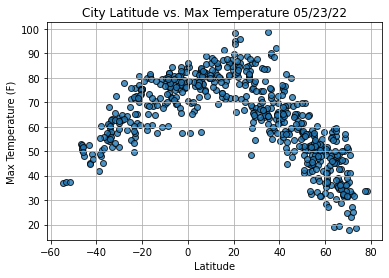

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

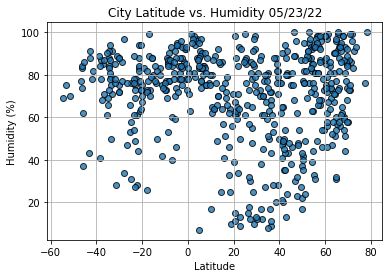

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

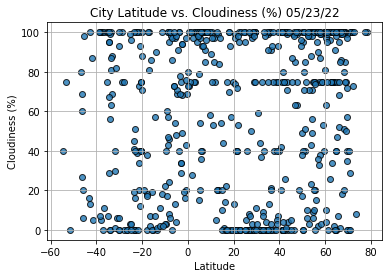

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

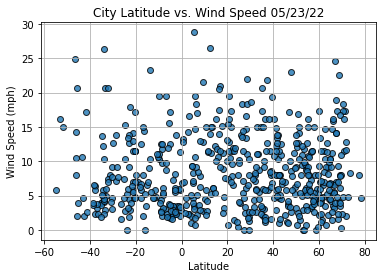

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                         Wuda
Country                        CN
Date          2022-05-23 20:26:47
Lat                       39.4994
Lng                      106.7117
Max Temp                    69.55
Humidity                       28
Cloudiness                      7
Wind Speed                    6.8
Name: 13, dtype: object

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

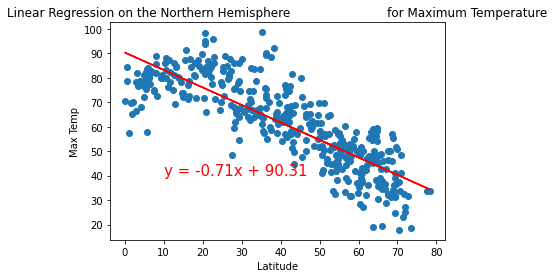

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

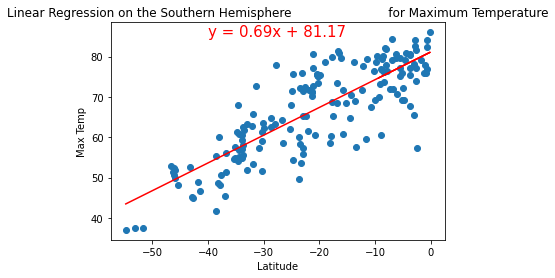

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,85))

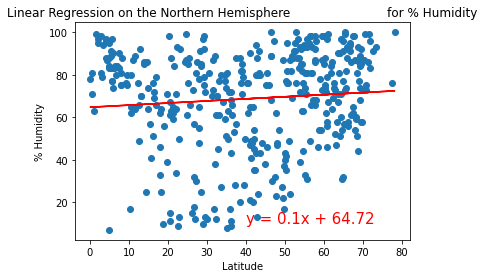

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

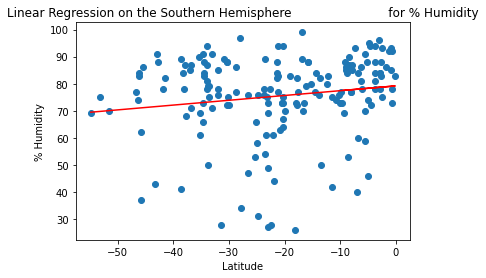

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

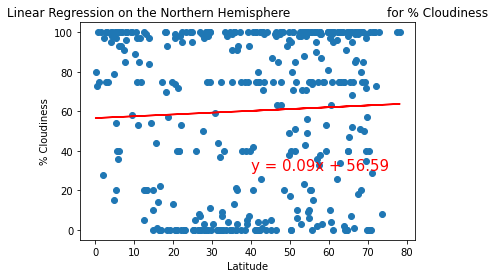

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

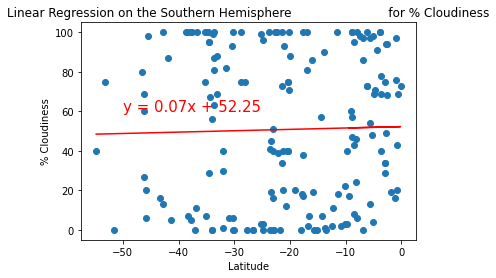

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

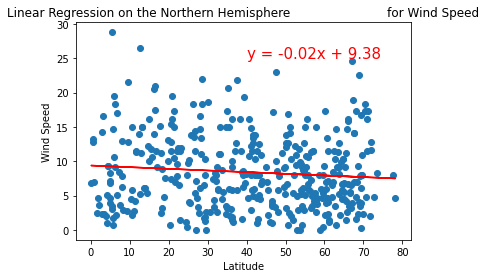

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

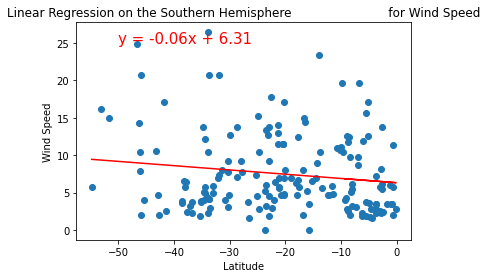

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))